In [1]:
import numpy as np
import scipy.integrate
%matplotlib inline
import matplotlib.pyplot as plt

The following liquid phase elementary autocatalytic reaction occurs in a semi batch reactor:
$$ A + B \rightarrow 2B $$
The rate constant is $0.25 \frac{l}{mol.min}$. The reactor is initially filled with 1 liter of pure A (concentration or molar density of $5 \frac{mol}{l}$). Component B (also with molar density of $5 \frac{mol}{l}$) is slowly added at $ 50 \frac{ml}{min}$. Plot the concentration of B as well as the reaction rate as a function of time and determine the maximum rate of conversion of A and the time where it is obeserved.

In [2]:
# Parameters
CAo = 5 # mol/l
CBo = 0 # mol/l
Q_in = 0.05 # l/min
Q_out = 0 # l/min
CB_in = 5 # mol/l
CA_in = 0 # mol/l
Vo = 1 # l
k = 0.25 # l/mol.min

In [3]:
def ri(CA, CB):
    rA = -k*CA*CB
    rB = -rA
    return [rA, rB]

In [4]:
def semibatch(t, var):
    CA, CB, V = var
    rA, rB = ri(CA, CB)
    dVdt = Q_in 
    dCAdt = (CA_in*Q_in + rA*V - dVdt*CA)/V
    dCBdt = (CB_in*Q_in + rB*V - dVdt*CB)/V
    return [dCAdt, dCBdt, dVdt]

In [5]:
tspan = [0, 10]
init = np.array([CAo, CBo, Vo])
batch = scipy.integrate.solve_ivp(semibatch, tspan, init, dense_output=True)

In [6]:
trange = np.linspace(0, tspan[1], 1000)
Vals = batch.sol(trange)
CA, CB, Vol = Vals

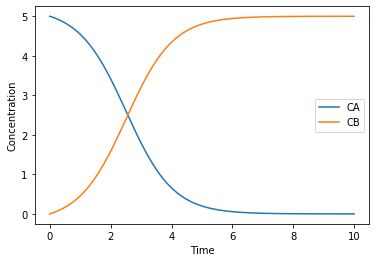

In [7]:
plt.figure(1)
plt.plot(trange, CA, label='CA')
plt.plot(trange, CB, label='CB')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

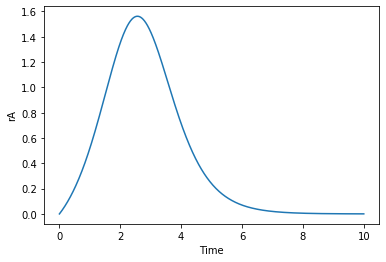

In [8]:
nrAs = k*CA*CB
plt.figure(2)
plt.plot(trange, nrAs)
plt.xlabel('Time')
plt.ylabel('rA')
plt.show()

In [9]:
rmax = max(nrAs)
timemax = trange[(nrAs == rmax)]
print('Maximum rate of', np.round(rmax, 2), 'at', np.round(timemax[0], 2), 'min')

Maximum rate of 1.56 at 2.56 min
